In [3]:
# pip install pandoc

In [4]:
# import pandoc

In [5]:
# pip install nbconvert

In [6]:
# from nbconvert import webpdf

### Assignment 6: MongoDB

While many of you have done so already before our last lecture, we want each of you to successfully install MongoDB on your system and get your programming language of choice (Python or Java) to connect to it.  Therefore, please do the following:

- Install MongoDB on your system (https://www.mongodb.com/try/download/communityLinks to an external site. “on-premises”). I recommend also installing a GUI so that you can quickly see what's going on (e.g., Studio 3T).

- Download the sample MongoDB dumps I uploaded to Canvas (in “Class 7”) (including the Pokémon sample DB)

- Connect your programming language of choice (Python, see e.g. https://www.mongodb.com/blog/post/getting-started-with-python-and-mongodbLinks to an external site. or Java, see e.g. https://www.mongodb.com/blog/post/getting-started-with-mongodb-and-java-part-iLinks to an external site.) to MongoDB.

In [51]:
import sys
!{sys.executable} -m pip install pymongo

In [1]:
# import the PyMongo library
import pymongo
from pymongo import MongoClient

### Question 1

(Let’s get things started …) Please write code (Python or Java) to query and print to screen all Pokémon character “name”s (and “_id” but not the entire document) with candy_count >= month + day of your birthday  (e.g., my birthday is 2/12 and I query candy_count >= 14 as 2+12 = 14).  (25% of points)   (Note:  the MongoDB operator for “>=” is “$gte”)

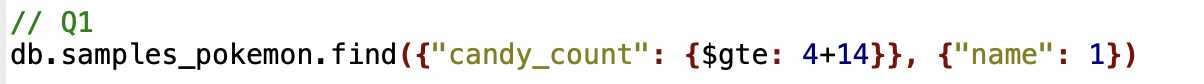

In [2]:
# connect to the MongoDB server
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

# specify the name of the database to use
mydb = myclient["samples_pokemon"]

# specify the name of the collection to use
mycol = mydb["samples_pokemon"]

# define the query to use for filtering the results
myquery = { "candy_count": {"$gte": 4+14} }

# define the projection to use for selecting the columns to return
# in this case, only the "name" column is selected
myprojection = { "name": 1 }

# execute the query and retrieve the results
mydoc = mycol.find(myquery, myprojection)

In [54]:
# initialize a variable to keep track of the number of results
n = 0

# iterate over the documents in the result set
for x in mydoc:
    
    # print each document to the console
    print(x)
    
    # increment the counter for each result
    n = n+1

{'_id': ObjectId('58f56170ee9d4bd5e610d644'), 'name': 'Bulbasaur'}
{'_id': ObjectId('58f56171ee9d4bd5e610d645'), 'name': 'Ivysaur'}
{'_id': ObjectId('58f56171ee9d4bd5e610d647'), 'name': 'Charmander'}
{'_id': ObjectId('58f56171ee9d4bd5e610d648'), 'name': 'Charmeleon'}
{'_id': ObjectId('58f56171ee9d4bd5e610d64a'), 'name': 'Squirtle'}
{'_id': ObjectId('58f56171ee9d4bd5e610d64b'), 'name': 'Wartortle'}
{'_id': ObjectId('58f56171ee9d4bd5e610d64e'), 'name': 'Metapod'}
{'_id': ObjectId('58f56171ee9d4bd5e610d651'), 'name': 'Kakuna'}
{'_id': ObjectId('58f56171ee9d4bd5e610d654'), 'name': 'Pidgeotto'}
{'_id': ObjectId('58f56171ee9d4bd5e610d656'), 'name': 'Rattata'}
{'_id': ObjectId('58f56171ee9d4bd5e610d658'), 'name': 'Spearow'}
{'_id': ObjectId('58f56171ee9d4bd5e610d65a'), 'name': 'Ekans'}
{'_id': ObjectId('58f56171ee9d4bd5e610d65c'), 'name': 'Pikachu'}
{'_id': ObjectId('58f56171ee9d4bd5e610d65e'), 'name': 'Sandshrew'}
{'_id': ObjectId('58f56171ee9d4bd5e610d660'), 'name': 'Nidoran ♀ (Female)'}
{'

In [55]:
# print to screen the number of selected entries
print(n)

67


### Question 2

(Let’s sprinkle in a little or …) Please write code (Python or Java) to query and print to screen all Pokémon character “name”s (and “_id” but not the entire document) with num = month or num = day of your birthday  (e.g., my birthday is 2/12 and I have to query num = 2 or num = 12).  (25% of points)

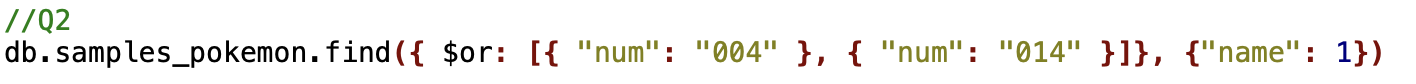

In [56]:
# modify the filtering condition in the query according to the question
# note that "num" should be either "004" or "014", rather than "4" or "14"
myquery = { "$or": [{ "num": "004" }, { "num": "014" }]}

# execute the query and retrieve the results
mydoc = mycol.find(myquery,{ "name": 1})

In [57]:
n = 0

# iterate over the documents in the result set
for x in mydoc:
    
    print(x)
    
    n = n+1

{'_id': ObjectId('58f56171ee9d4bd5e610d647'), 'name': 'Charmander'}
{'_id': ObjectId('58f56171ee9d4bd5e610d651'), 'name': 'Kakuna'}


### Question 3

MongoDB supports RegEx.  The MongoDB operator for RegEx is "$regex".  

For example, to find all Crunchbase documents that have a (company) name that starts with a lower case character, we can search for “db.crunchbase_database.find({"name" : {$regex : "^[a-z].*"}})”

(And some RegEx as well …) Please write code (Python or Java) to query and print to screen all Crunchbase company “name”s (and “_id” but not the entire document) that have “text” in their “tag_list”.  (25% of points)

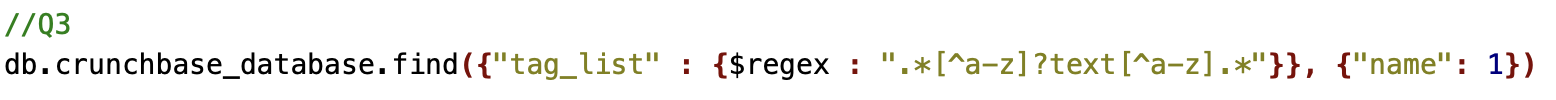

In [63]:
# use a different database according to the question
mydb = myclient["crunchbase"]

# use a different collection name according to the question
mycol = mydb["crunchbase_database"]

# modify the filtering condition in the query according to the question
# to use RegEx to find all entries that include the word "text"
myquery = {"tag_list" : {"$regex": ".*[^a-z]?text[^a-z].*"}}

# execute the query and retrieve the results
mydoc = mycol.find(myquery,{ "name": 1})

In [64]:
# iterate over the documents in the result set
for x in mydoc:
    
    print(x)

{'_id': ObjectId('52cdef7d4bab8bd675298ed4'), 'name': 'Textic'}
{'_id': ObjectId('52cdef7e4bab8bd67529ba46'), 'name': 'My Text Secret'}
{'_id': ObjectId('52cdef7c4bab8bd67529853c'), 'name': 'kwiry'}
{'_id': ObjectId('52cdef7d4bab8bd67529950c'), 'name': 'Cycorp'}


### Question 4

(This is the final enemy. This question is equivalent of being in the final level of Super Mario facing Bowser)  Please write code (Python or Java) to query and print to screen all Crunchbase company “name”s and “twitter_username” (and “_id” but not the entire document) that (i) were founded between 2000 and 2010 (including 2000 and 2010), or (ii) email address is ending in “@gmail.com”.  (25% of points)

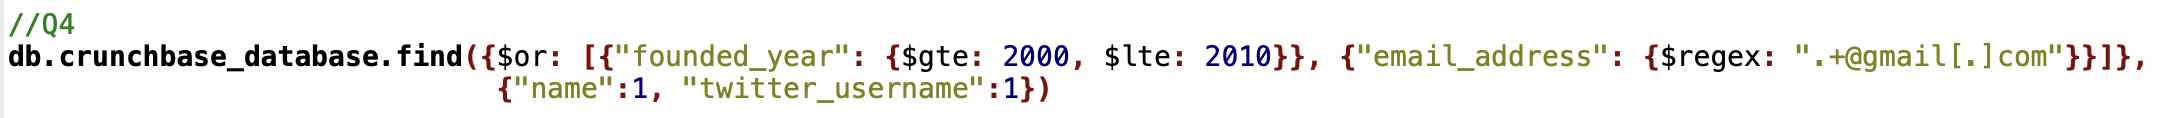

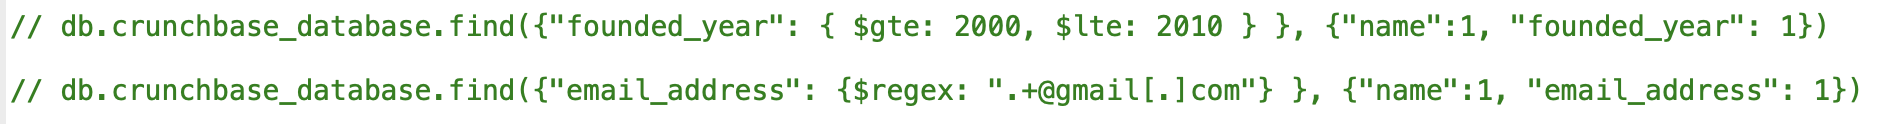

In [60]:
# modify the filtering condition in the query according to the question
myquery = {"$or": [{"founded_year": {"$gte": 2000, "$lte": 2010}}, {"email_address": {"$regex": ".+@gmail[.]com"}}]}

# execute the query and retrieve the results
# to select two columns "name" & "twitter_username"
mydoc = mycol.find(myquery, {"name": 1, "twitter_username": 1})

In [61]:
n = 0

# iterate over the documents in the result set
for x in mydoc:
    
    print(x)
    
    n = n+1

{'_id': ObjectId('52cdef7e4bab8bd67529a3ae'), 'name': 'ZipWeb', 'twitter_username': None}
{'_id': ObjectId('52cdef7c4bab8bd67529829b'), 'name': 'PlanJam', 'twitter_username': None}
{'_id': ObjectId('52cdef7f4bab8bd67529c4be'), 'name': 'Avenda Systems', 'twitter_username': 'avenda_systems'}
{'_id': ObjectId('52cdef7f4bab8bd67529c07f'), 'name': 'Ray Websmith', 'twitter_username': ''}
{'_id': ObjectId('52cdef7d4bab8bd67529a0ae'), 'name': 'MyFreeImplants', 'twitter_username': 'myfreeimplants'}
{'_id': ObjectId('52cdef7e4bab8bd67529b289'), 'name': 'Ekartha', 'twitter_username': ''}
{'_id': ObjectId('52cdef7e4bab8bd67529ac28'), 'name': 'Clear Light Digital', 'twitter_username': None}
{'_id': ObjectId('52cdef7c4bab8bd6752982e8'), 'name': 'LibraryThing', 'twitter_username': 'LibraryThing'}
{'_id': ObjectId('52cdef7f4bab8bd67529c007'), 'name': 'Delhitoagra', 'twitter_username': 'delhitoagra'}
{'_id': ObjectId('52cdef7e4bab8bd67529a5e2'), 'name': 'Connectize', 'twitter_username': None}
{'_id': O

In [62]:
# print to screen the number of selected entries
print(n)

573
